Installing necessary Libraries

In [2]:
!pip install snowflake-connector-python

     ---------------------------------------- 0.0/63.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/63.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/63.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/63.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/63.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/63.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/63.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/63.4 kB ? eta -:--:--
     ------------ -------------------------- 20.5/63.4 kB 59.5 kB/s eta 0:00:01
     ------------------ -------------------- 30.7/63.4 kB 81.9 kB/s eta 0:00:01
     ------------------ -------------------- 30.7/63.4 kB 81.9 kB/s eta 0:00:01
     ------------------------------ ------- 51.2/63.4 kB 119.1 kB/s eta 0:00:01
     ------------------------------------ - 61.4/63.4 kB 130.9 kB/s eta 0:00:01
     ---------------

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python312\\Scripts\\snowflake-dump-certs.exe' -> 'C:\\Python312\\Scripts\\snowflake-dump-certs.exe.deleteme'



In [41]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.8.4-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.8.4-cp312-cp312-win_amd64.whl (7.7 MB)
Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl (189 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)


In [4]:
!pip install xgboost

  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.6 kB 217.9 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.6 kB 327.7 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 357.0 kB/s eta 0:00:00
Using cached xgboost-2.0.3-py3-none-win_amd64.whl (99.8 MB)
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.9 MB 2.0 MB/s eta 0:00:23
   ---------------------------------------- 0.1/45.9 MB 1.7 MB/s eta 0:00:28
   ---------------------------------------- 0.1/45.9 MB 1.4 MB/s eta 0:00:32
   ---------------------------------------- 0.3/45.9 MB 1.7 MB/s eta 0:00:27
   ---------------------------------------- 0.3/45.9 MB 1.8 MB/s eta 0:00:27
   ---------------------------

Importing all necessary libraries

In [44]:
!pip install scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 660.6 kB/s eta 0:00:16
   ---------------------------------------- 0.1/10.6 MB 1.1 MB/s eta 0:00:11
    --------------------------------------- 0.1/10.6 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.3/10.6 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.4/10.6 MB 1.5 MB/s eta 0:00:07
   - -------------------------------------- 0.4/10.6 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.5/10.6 MB 1.5 MB/s eta 0:00:07
   -- ------------------------------------- 0.7/10.6 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/10.6 MB 1.8 MB/s eta 0:00:06
   -- ------------------------------------- 0.8/10.6 MB 1.6 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/10.6 MB 1.5 MB/s eta 0:00:07
   --- ------------------------------------ 0.9/10.6 MB 1.6 MB/s eta 0:00:07
   -

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
# import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

import xgboost as xgb

In [46]:
import snowflake.connector as snwconn

Setting parameters to connect with snowflake-cloud

In [47]:
conn_params = {
  'account': 'JEAEQNT-NX80843',
  'user': 'sudatra',
  'password': 'J@tu2303',
  'warehouse': 'COMPUTE_WH',
  'database': 'JMAN_FINAL_PROJECT',
  'schema': 'DBO_MART'
}

Connecting to snowflake

In [48]:
conn = snwconn.connect(**conn_params)
cursor = conn.cursor()

In [49]:
query = "select * from REGISTERED_FINAL"

cursor.execute(query)
data = cursor.fetchall()
columns = [col[0] for col in cursor.description]

snowflake_df = pd.DataFrame(data, columns=columns)

In [50]:
snowflake_df

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,REGISTERED,RESOURCE_LINK,DESCRIPTION,ID,FIRST_NAME,LAST_NAME,EMAIL,GENDER,DESIGNATION,C7
0,5,13,Data Engineering Bootcamp: Hands-On Training,Data-engineering,18-10-2023,20:20:00,09:04:00,jarvis,Konstanze Kinghorne,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,5,Gilly,de Cullip,gdecullip4@jimdo.com,Female,junior software engineer,9
1,7,7,Data Science Symposium: Innovations & Insights,Data-science,08-04-2023,15:14:00,01:58:00,tardis,Cacilia Castagnet,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,7,Austin,Stitcher,astitcher6@behance.net,Female,junior software engineer,8
2,3,16,Data Analytics Panel: Industry Experts' Insights,Data-analytics,26-04-2023,21:34:00,03:08:00,aurum,Roseline Jearum,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,3,Peder,Skahill,pskahill2@mozilla.org,Male,intern,1
3,47,10,Data Analytics for Business Professionals,Data-analytics,16-12-2023,13:09:00,02:09:00,groot,Edin Rozzell,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,47,Perice,Whipp,pwhipp1a@redcross.org,Male,senior software engineer,9
4,92,6,Databases Administration Training,Databases,11-10-2023,20:33:00,01:40:00,falcon,Amalle Della,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,92,Aurelie,Jarman,ajarman2j@nsw.gov.au,Non-binary,intern,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,69,18,Full Stack Showcase: Projects and Portfolios,Full-stack,10-05-2024,13:22:00,04:12:00,jarvis,Cully Papis,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,69,Hedy,Skews,hskews1w@list-manage.com,Female,junior software engineer,6
996,88,13,Data Engineering Bootcamp: Hands-On Training,Data-engineering,18-10-2023,20:20:00,09:04:00,jarvis,Konstanze Kinghorne,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,88,Marcellina,Ashmore,mashmore2f@bizjournals.com,Female,junior software engineer,10
997,57,29,Databases Roundtable Discussion,Databases,17-04-2023,20:02:00,02:03:00,oasis,Lorelle Hallworth,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,57,Aaron,Garbert,agarbert1k@google.it,Bigender,senior software engineer,10
998,41,28,Full Stack Hackathon: Building Next-Gen Apps,Full-stack,25-04-2024,11:07:00,05:12:00,falcon,Marcus Steanyng,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,41,Audi,Lingner,alingner14@arizona.edu,Female,tribe master,5


Storing snowflake data in csv file

In [51]:
snowflake_df.to_csv('snowflake-data.csv', index=False)

Reading Data

In [52]:
dataset = pd.read_csv('./dataset-snowflake.csv')
dataset

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,REGISTERED,RESOURCE_LINK,DESCRIPTION,ID,FIRST_NAME,LAST_NAME,EMAIL,GENDER,DESIGNATION,EXPERIENCE
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,84,Adel,Schenkel,aschenkel2b@ustream.tv,Female,intern,7
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,19,Kiley,Cafe,kcafei@un.org,Female,intern,10
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,Male,consultant,1
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,Male,consultant,1
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,88,Isador,Chillcot,ichillcot2f@amazon.de,Male,consultant,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,45,Lynelle,Le Noire,llenoire18@cam.ac.uk,Female,tribe master,9
996,7,6,Databases Conference & Expo,database,04-04-2024,14:51:00,00:41:00,tardis,Kathryn Monckton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,7,Ailis,Stickney,astickney6@nih.gov,Female,senior software engineer,10
997,53,12,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,13-12-2023,16:33:00,09:04:00,falcon,Murry Geharke,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,53,Mehetabel,Giocannoni,mgiocannoni1g@cdbaby.com,Female,junior software engineer,5
998,34,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,34,Modesta,Klimuk,mklimukx@examiner.com,Polygender,consultant,10


In [15]:
df = dataset.copy()
df

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,REGISTERED,RESOURCE_LINK,DESCRIPTION,ID,FIRST_NAME,LAST_NAME,EMAIL,GENDER,DESIGNATION,EXPERIENCE
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,84,Adel,Schenkel,aschenkel2b@ustream.tv,Female,intern,7
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,19,Kiley,Cafe,kcafei@un.org,Female,intern,10
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,Male,consultant,1
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,Male,consultant,1
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,88,Isador,Chillcot,ichillcot2f@amazon.de,Male,consultant,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,45,Lynelle,Le Noire,llenoire18@cam.ac.uk,Female,tribe master,9
996,7,6,Databases Conference & Expo,database,04-04-2024,14:51:00,00:41:00,tardis,Kathryn Monckton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,7,Ailis,Stickney,astickney6@nih.gov,Female,senior software engineer,10
997,53,12,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,13-12-2023,16:33:00,09:04:00,falcon,Murry Geharke,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,53,Mehetabel,Giocannoni,mgiocannoni1g@cdbaby.com,Female,junior software engineer,5
998,34,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,34,Modesta,Klimuk,mklimukx@examiner.com,Polygender,consultant,10


Analysing Data shapes and performing Data cleaning

In [53]:
df.shape

(1000, 31)

In [54]:
df.describe()

,USERR_ID,EVENT_ID,CAPACITY,REGISTERED,ID,EXPERIENCE
count,1000.000000,1000.000000,1000.00000,1000.0,1000.000000,1000.000000
mean,49.438000,15.454000,46.42000,0.0,49.438000,4.929000
std,28.584213,8.637157,4.79652,0.0,28.584213,3.239823
min,1.000000,1.000000,40.00000,0.0,1.000000,0.000000
25%,24.750000,8.000000,40.00000,0.0,24.750000,2.000000
50%,49.000000,15.000000,50.00000,0.0,49.000000,5.000000
75%,74.000000,23.000000,50.00000,0.0,74.000000,7.000000
max,100.000000,30.000000,50.00000,0.0,100.000000,10.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   USERR_ID          1000 non-null   int64 
 1   EVENT_ID          1000 non-null   int64 
 2   NAME              1000 non-null   object
 3   DOMAIN            1000 non-null   object
 4   DATE              1000 non-null   object
 5   STARTTIME         1000 non-null   object
 6   ENDTIME           1000 non-null   object
 7   LOCATION          1000 non-null   object
 8   TRAINER           1000 non-null   object
 9   CAPACITY          1000 non-null   int64 
 10  REGISTERED        1000 non-null   int64 
 11  RESOURCE_LINK     1000 non-null   object
 12  DESCRIPTION       1000 non-null   object
 13  ID                1000 non-null   int64 
 14  FIRST_NAME        1000 non-null   object
 15  LAST_NAME         1000 non-null   object
 16  EMAIL             1000 non-null   object
 17  GENDER         

In [56]:
null_count = df.isnull().sum()
null_count

USERR_ID            0
EVENT_ID            0
NAME                0
DOMAIN              0
DATE                0
STARTTIME           0
ENDTIME             0
LOCATION            0
TRAINER             0
CAPACITY            0
REGISTERED          0
RESOURCE_LINK       0
DESCRIPTION         0
ID                  0
FIRST_NAME          0
LAST_NAME           0
EMAIL               0
GENDER              0
DESIGNATION         0
EXPERIENCE          0
React               0
Javascript          0
Node                0
Python              0
Machine_Learning    0
NoSQL               0
ETL                 0
Data_Warehouse      0
Big_Data            0
HTML                0
SQL                 0
dtype: int64

In [57]:
percentage_null = (null_count / len(df)) * 100
percentage_null

USERR_ID            0.0
EVENT_ID            0.0
NAME                0.0
DOMAIN              0.0
DATE                0.0
STARTTIME           0.0
ENDTIME             0.0
LOCATION            0.0
TRAINER             0.0
CAPACITY            0.0
REGISTERED          0.0
RESOURCE_LINK       0.0
DESCRIPTION         0.0
ID                  0.0
FIRST_NAME          0.0
LAST_NAME           0.0
EMAIL               0.0
GENDER              0.0
DESIGNATION         0.0
EXPERIENCE          0.0
React               0.0
Javascript          0.0
Node                0.0
Python              0.0
Machine_Learning    0.0
NoSQL               0.0
ETL                 0.0
Data_Warehouse      0.0
Big_Data            0.0
HTML                0.0
SQL                 0.0
dtype: float64

In [58]:
df

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,...,Javascript,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,...,True,True,False,False,True,True,False,False,True,False
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,...,False,False,False,False,False,True,True,True,False,True
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,...,True,False,False,False,True,True,False,False,True,True
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,...,True,False,False,False,True,True,False,False,True,True
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,...,True,True,True,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,...,False,False,True,False,True,True,False,False,False,False
996,7,6,Databases Conference & Expo,database,04-04-2024,14:51:00,00:41:00,tardis,Kathryn Monckton,50,...,False,False,True,False,True,False,True,True,True,False
997,53,12,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,13-12-2023,16:33:00,09:04:00,falcon,Murry Geharke,50,...,False,True,False,True,True,True,True,True,True,True
998,34,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,...,True,False,True,False,True,True,True,True,False,True


In [59]:
df.head(5)

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,...,Javascript,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,...,True,True,False,False,True,True,False,False,True,False
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,...,False,False,False,False,False,True,True,True,False,True
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,...,True,False,False,False,True,True,False,False,True,True
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,...,True,False,False,False,True,True,False,False,True,True
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,...,True,True,True,False,True,True,True,True,True,True


In [60]:
df['React'] = np.random.choice([True, False], size=len(df))
df['Javascript'] = np.random.choice([True, False], size=len(df))
df['Node'] = np.random.choice([True, False], size=len(df))
df['Python'] = np.random.choice([True, False], size=len(df))
df['Machine_Learning'] = np.random.choice([True, False], size=len(df))
df['NoSQL'] = np.random.choice([True, False], size=len(df))
df['ETL'] = np.random.choice([True, False], size=len(df))
df['Data_Warehouse'] = np.random.choice([True, False], size=len(df))
df['Big_Data'] = np.random.choice([True, False], size=len(df))
df['HTML'] = np.random.choice([True, False], size=len(df))
df['SQL'] = np.random.choice([True, False], size=len(df))


In [61]:
df['React'] = df.groupby('USERR_ID')['React'].transform('first')
df['Javascript'] = df.groupby('USERR_ID')['Javascript'].transform('first')
df['Node'] = df.groupby('USERR_ID')['Node'].transform('first')
df['Python'] = df.groupby('USERR_ID')['Python'].transform('first')
df['Machine_Learning'] = df.groupby('USERR_ID')['Machine_Learning'].transform('first')
df['NoSQL'] = df.groupby('USERR_ID')['NoSQL'].transform('first')
df['ETL'] = df.groupby('USERR_ID')['ETL'].transform('first')
df['Data_Warehouse'] = df.groupby('USERR_ID')['Data_Warehouse'].transform('first')
df['Big_Data'] = df.groupby('USERR_ID')['Big_Data'].transform('first')
df['HTML'] = df.groupby('USERR_ID')['HTML'].transform('first')
df['SQL'] = df.groupby('USERR_ID')['SQL'].transform('first')

In [62]:
df.head(5)

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,...,Javascript,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,...,False,False,False,True,True,True,False,False,True,True
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,...,False,True,True,False,False,True,False,False,False,True
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,...,False,False,False,False,False,True,False,True,True,False
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,...,False,False,False,False,False,True,False,True,True,False
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,...,True,False,False,False,False,False,False,True,False,True


In [63]:
df_clean = df.copy()
df_clean

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,...,Javascript,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,...,False,False,False,True,True,True,False,False,True,True
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,...,False,True,True,False,False,True,False,False,False,True
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,...,False,False,False,False,False,True,False,True,True,False
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,...,False,False,False,False,False,True,False,True,True,False
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,...,True,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,...,False,False,False,False,True,False,True,True,False,True
996,7,6,Databases Conference & Expo,database,04-04-2024,14:51:00,00:41:00,tardis,Kathryn Monckton,50,...,False,False,False,False,True,False,False,True,True,True
997,53,12,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,13-12-2023,16:33:00,09:04:00,falcon,Murry Geharke,50,...,True,True,False,False,False,False,True,False,True,True
998,34,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,...,True,True,False,False,True,True,False,True,True,False


In [64]:
df_clean = df_clean.drop(columns=['EVENT_ID','USERR_ID','REGISTERED','RESOURCE_LINK',
                      'DESCRIPTION','ID','FIRST_NAME','LAST_NAME', 'EMAIL'])
df_clean.head(5)

,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,GENDER,DESIGNATION,...,Javascript,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL
0,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,Female,intern,...,False,False,False,True,True,True,False,False,True,True
1,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,Female,intern,...,False,True,True,False,False,True,False,False,False,True
2,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,Male,consultant,...,False,False,False,False,False,True,False,True,True,False
3,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,Male,consultant,...,False,False,False,False,False,True,False,True,True,False
4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,Male,consultant,...,True,False,False,False,False,False,False,True,False,True


In [65]:
df_clean.shape

(1000, 22)

In [66]:
df_clean['STARTTIME'] = pd.to_datetime(df_clean['STARTTIME'], format='%H:%M:%S')
df_clean['ENDTIME'] = pd.to_datetime(df_clean['ENDTIME'], format='%H:%M:%S')

In [67]:
df_clean

,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,GENDER,DESIGNATION,...,Javascript,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL
0,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,1900-01-01 17:35:00,1900-01-01 07:17:00,aurum,Dermot Matteoni,50,Female,intern,...,False,False,False,True,True,True,False,False,True,True
1,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,1900-01-01 18:33:00,1900-01-01 02:24:00,falcon,Benjamen Pass,40,Female,intern,...,False,True,True,False,False,True,False,False,False,True
2,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,1900-01-01 21:09:00,1900-01-01 02:19:00,tardis,Anica Skeemor,40,Male,consultant,...,False,False,False,False,False,True,False,True,True,False
3,Data Analytics for Business Professionals,data-analytics,24-05-2024,1900-01-01 14:48:00,1900-01-01 01:59:00,jarvis,Cordey Panton,50,Male,consultant,...,False,False,False,False,False,True,False,True,True,False
4,Full Stack Development Bootcamp,full-stack,04-07-2023,1900-01-01 19:09:00,1900-01-01 03:37:00,aurum,Selma Eathorne,50,Male,consultant,...,True,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,1900-01-01 17:53:00,1900-01-01 03:11:00,tardis,Clemmie Gallaher,50,Female,tribe master,...,False,False,False,False,True,False,True,True,False,True
996,Databases Conference & Expo,database,04-04-2024,1900-01-01 14:51:00,1900-01-01 00:41:00,tardis,Kathryn Monckton,50,Female,senior software engineer,...,False,False,False,False,True,False,False,True,True,True
997,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,13-12-2023,1900-01-01 16:33:00,1900-01-01 09:04:00,falcon,Murry Geharke,50,Female,junior software engineer,...,True,True,False,False,False,False,True,False,True,True
998,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,1900-01-01 17:53:00,1900-01-01 03:11:00,tardis,Clemmie Gallaher,50,Polygender,consultant,...,True,True,False,False,True,True,False,True,True,False


In [68]:
df_clean['DURATION'] = (df_clean['STARTTIME'] - df_clean['ENDTIME']).dt.total_seconds() / 3600
df_clean['DURATION'] = df_clean['DURATION'].abs()
df_clean['DURATION'] = df_clean['DURATION'].round()

df_clean

,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,GENDER,DESIGNATION,...,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL,DURATION
0,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,1900-01-01 17:35:00,1900-01-01 07:17:00,aurum,Dermot Matteoni,50,Female,intern,...,False,False,True,True,True,False,False,True,True,10.0
1,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,1900-01-01 18:33:00,1900-01-01 02:24:00,falcon,Benjamen Pass,40,Female,intern,...,True,True,False,False,True,False,False,False,True,16.0
2,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,1900-01-01 21:09:00,1900-01-01 02:19:00,tardis,Anica Skeemor,40,Male,consultant,...,False,False,False,False,True,False,True,True,False,19.0
3,Data Analytics for Business Professionals,data-analytics,24-05-2024,1900-01-01 14:48:00,1900-01-01 01:59:00,jarvis,Cordey Panton,50,Male,consultant,...,False,False,False,False,True,False,True,True,False,13.0
4,Full Stack Development Bootcamp,full-stack,04-07-2023,1900-01-01 19:09:00,1900-01-01 03:37:00,aurum,Selma Eathorne,50,Male,consultant,...,False,False,False,False,False,False,True,False,True,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,1900-01-01 17:53:00,1900-01-01 03:11:00,tardis,Clemmie Gallaher,50,Female,tribe master,...,False,False,False,True,False,True,True,False,True,15.0
996,Databases Conference & Expo,database,04-04-2024,1900-01-01 14:51:00,1900-01-01 00:41:00,tardis,Kathryn Monckton,50,Female,senior software engineer,...,False,False,False,True,False,False,True,True,True,14.0
997,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,13-12-2023,1900-01-01 16:33:00,1900-01-01 09:04:00,falcon,Murry Geharke,50,Female,junior software engineer,...,True,False,False,False,False,True,False,True,True,7.0
998,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,1900-01-01 17:53:00,1900-01-01 03:11:00,tardis,Clemmie Gallaher,50,Polygender,consultant,...,True,False,False,True,True,False,True,True,False,15.0


In [69]:
df_clean = df_clean.drop(columns=['STARTTIME', 'ENDTIME'])
df_clean

,NAME,DOMAIN,DATE,LOCATION,TRAINER,CAPACITY,GENDER,DESIGNATION,EXPERIENCE,React,...,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL,DURATION
0,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,aurum,Dermot Matteoni,50,Female,intern,7,True,...,False,False,True,True,True,False,False,True,True,10.0
1,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,falcon,Benjamen Pass,40,Female,intern,10,False,...,True,True,False,False,True,False,False,False,True,16.0
2,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,tardis,Anica Skeemor,40,Male,consultant,1,True,...,False,False,False,False,True,False,True,True,False,19.0
3,Data Analytics for Business Professionals,data-analytics,24-05-2024,jarvis,Cordey Panton,50,Male,consultant,1,True,...,False,False,False,False,True,False,True,True,False,13.0
4,Full Stack Development Bootcamp,full-stack,04-07-2023,aurum,Selma Eathorne,50,Male,consultant,0,True,...,False,False,False,False,False,False,True,False,True,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,tardis,Clemmie Gallaher,50,Female,tribe master,9,False,...,False,False,False,True,False,True,True,False,True,15.0
996,Databases Conference & Expo,database,04-04-2024,tardis,Kathryn Monckton,50,Female,senior software engineer,10,False,...,False,False,False,True,False,False,True,True,True,14.0
997,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,13-12-2023,falcon,Murry Geharke,50,Female,junior software engineer,5,True,...,True,False,False,False,False,True,False,True,True,7.0
998,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,tardis,Clemmie Gallaher,50,Polygender,consultant,10,True,...,True,False,False,True,True,False,True,True,False,15.0


In [70]:
df_clean['DATE'] = pd.to_datetime(df_clean['DATE'], format='%d-%m-%Y')
df_clean['MONTH'] = df_clean['DATE'].dt.month

df_clean

,NAME,DOMAIN,DATE,LOCATION,TRAINER,CAPACITY,GENDER,DESIGNATION,EXPERIENCE,React,...,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL,DURATION,MONTH
0,Advanced Data Engineering Techniques Seminar,data-engineering,2023-10-17,aurum,Dermot Matteoni,50,Female,intern,7,True,...,False,True,True,True,False,False,True,True,10.0,10
1,Full Stack Webinar Series: Frontend to Backend,full-stack,2023-07-23,falcon,Benjamen Pass,40,Female,intern,10,False,...,True,False,False,True,False,False,False,True,16.0,7
2,Data Science Summit: Cutting-Edge Research,data-science,2023-09-29,tardis,Anica Skeemor,40,Male,consultant,1,True,...,False,False,False,True,False,True,True,False,19.0,9
3,Data Analytics for Business Professionals,data-analytics,2024-05-24,jarvis,Cordey Panton,50,Male,consultant,1,True,...,False,False,False,True,False,True,True,False,13.0,5
4,Full Stack Development Bootcamp,full-stack,2023-07-04,aurum,Selma Eathorne,50,Male,consultant,0,True,...,False,False,False,False,False,True,False,True,16.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Full Stack Showcase: Projects and Portfolios,full-stack,2024-04-02,tardis,Clemmie Gallaher,50,Female,tribe master,9,False,...,False,False,True,False,True,True,False,True,15.0,4
996,Databases Conference & Expo,database,2024-04-04,tardis,Kathryn Monckton,50,Female,senior software engineer,10,False,...,False,False,True,False,False,True,True,True,14.0,4
997,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,2023-12-13,falcon,Murry Geharke,50,Female,junior software engineer,5,True,...,False,False,False,False,True,False,True,True,7.0,12
998,Full Stack Showcase: Projects and Portfolios,full-stack,2024-04-02,tardis,Clemmie Gallaher,50,Polygender,consultant,10,True,...,False,False,True,True,False,True,True,False,15.0,4


In [71]:
df_clean = df_clean.drop(columns=['DATE'])
df_clean

,NAME,DOMAIN,LOCATION,TRAINER,CAPACITY,GENDER,DESIGNATION,EXPERIENCE,React,Javascript,...,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL,DURATION,MONTH
0,Advanced Data Engineering Techniques Seminar,data-engineering,aurum,Dermot Matteoni,50,Female,intern,7,True,False,...,False,True,True,True,False,False,True,True,10.0,10
1,Full Stack Webinar Series: Frontend to Backend,full-stack,falcon,Benjamen Pass,40,Female,intern,10,False,False,...,True,False,False,True,False,False,False,True,16.0,7
2,Data Science Summit: Cutting-Edge Research,data-science,tardis,Anica Skeemor,40,Male,consultant,1,True,False,...,False,False,False,True,False,True,True,False,19.0,9
3,Data Analytics for Business Professionals,data-analytics,jarvis,Cordey Panton,50,Male,consultant,1,True,False,...,False,False,False,True,False,True,True,False,13.0,5
4,Full Stack Development Bootcamp,full-stack,aurum,Selma Eathorne,50,Male,consultant,0,True,True,...,False,False,False,False,False,True,False,True,16.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Full Stack Showcase: Projects and Portfolios,full-stack,tardis,Clemmie Gallaher,50,Female,tribe master,9,False,False,...,False,False,True,False,True,True,False,True,15.0,4
996,Databases Conference & Expo,database,tardis,Kathryn Monckton,50,Female,senior software engineer,10,False,False,...,False,False,True,False,False,True,True,True,14.0,4
997,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,falcon,Murry Geharke,50,Female,junior software engineer,5,True,True,...,False,False,False,False,True,False,True,True,7.0,12
998,Full Stack Showcase: Projects and Portfolios,full-stack,tardis,Clemmie Gallaher,50,Polygender,consultant,10,True,True,...,False,False,True,True,False,True,True,False,15.0,4


Define Label Encoder for Label Encoding classfication data

In [72]:
label_encoder = LabelEncoder()

In [73]:
!pip install scipy

In [74]:
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

# Assuming df is your DataFrame

# Function to calculate Chi-square statistic for boolean columns
def chi_square_for_bool(df):
    chi2_dict = {}
    for col in df.columns:
        if df[col].dtype == bool:
            observed = pd.crosstab(df[col], df['DOMAIN'])  # Assuming 'target_column' is your target variable
            chi2, p, dof, expected = chi2_contingency(observed)
            chi2_dict[col] = (chi2, p)
    return chi2_dict

# Function to calculate ANOVA relation matrix for numerical columns
def anova_relation_matrix(df):
    anova_dict = {}
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):
            groups = [df[df['DOMAIN'] == val][col].dropna() for val in df['DOMAIN'].unique()]
            anova_result = f_oneway(*groups)
            anova_dict[col] = anova_result
    return anova_dict

In [75]:
chi2_results = chi_square_for_bool(df_clean)
chi2_results


{'React': (1.5888959499472928, 0.8107864834594283),
 'Javascript': (1.4197274635746728, 0.8407591431222252),
 'Node': (1.238529410843825, 0.8717151731233361),
 'Python': (5.63959444508008, 0.22772878799003649),
 'Machine_Learning': (9.021876334222906, 0.0605549965987626),
 'NoSQL': (1.3557858327447114, 0.8518420756176063),
 'ETL': (5.731815494932199, 0.22009164977500945),
 'Data_Warehouse': (1.7719401429533246, 0.7776118737800922),
 'Big_Data': (1.9271421513623186, 0.7491573159762588),
 'HTML': (1.9980862107080892, 0.7361109041567516),
 'SQL': (3.139423682420903, 0.5347702451558323)}

In [76]:
anova_results = anova_relation_matrix(df_clean)
anova_results

{'CAPACITY': F_onewayResult(statistic=12.212634658947369, pvalue=1.0707960954283056e-09),
 'EXPERIENCE': F_onewayResult(statistic=1.6688807740226292, pvalue=0.15498956447362008),
 'DURATION': F_onewayResult(statistic=11.683666597944041, pvalue=2.82180773522523e-09),
 'MONTH': F_onewayResult(statistic=108.00002629510439, pvalue=1.869679208908053e-76)}

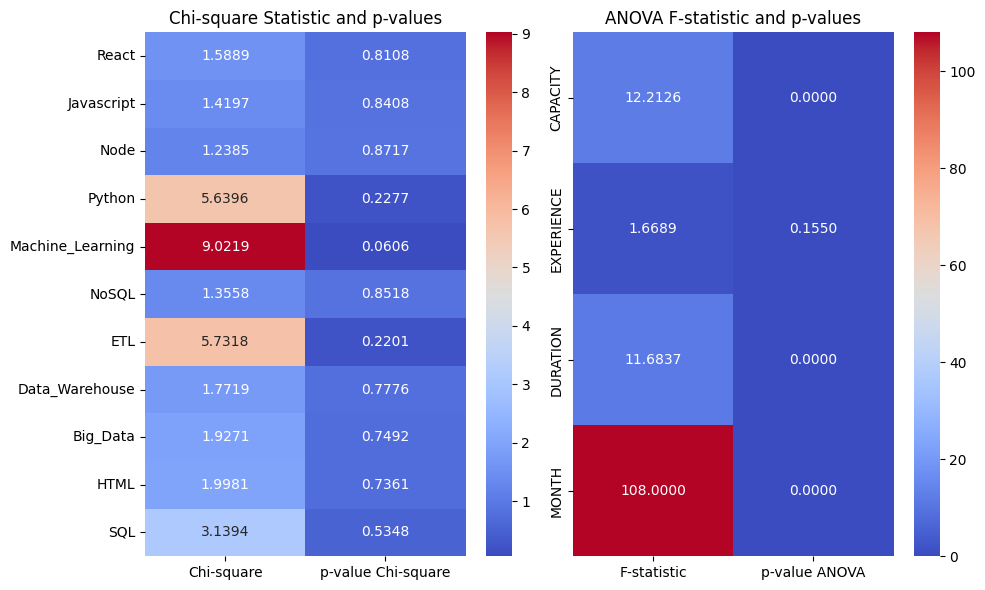

In [77]:
chi2_df = pd.DataFrame(chi2_results).T.rename(columns={0: 'Chi-square', 1: 'p-value Chi-square'})
anova_df = pd.DataFrame(anova_results).T.rename(columns={0: 'F-statistic', 1: 'p-value ANOVA'})

# Create heatmaps
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.heatmap(chi2_df, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Chi-square Statistic and p-values')

plt.subplot(1, 2, 2)
sns.heatmap(anova_df, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('ANOVA F-statistic and p-values')

plt.tight_layout()
plt.show()


Train Test Split

In [78]:
df_model = df_clean.copy()
X = df_model.drop(columns=['DOMAIN'])
y = df_model['DOMAIN']

In [79]:
df_model

,NAME,DOMAIN,LOCATION,TRAINER,CAPACITY,GENDER,DESIGNATION,EXPERIENCE,React,Javascript,...,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL,DURATION,MONTH
0,Advanced Data Engineering Techniques Seminar,data-engineering,aurum,Dermot Matteoni,50,Female,intern,7,True,False,...,False,True,True,True,False,False,True,True,10.0,10
1,Full Stack Webinar Series: Frontend to Backend,full-stack,falcon,Benjamen Pass,40,Female,intern,10,False,False,...,True,False,False,True,False,False,False,True,16.0,7
2,Data Science Summit: Cutting-Edge Research,data-science,tardis,Anica Skeemor,40,Male,consultant,1,True,False,...,False,False,False,True,False,True,True,False,19.0,9
3,Data Analytics for Business Professionals,data-analytics,jarvis,Cordey Panton,50,Male,consultant,1,True,False,...,False,False,False,True,False,True,True,False,13.0,5
4,Full Stack Development Bootcamp,full-stack,aurum,Selma Eathorne,50,Male,consultant,0,True,True,...,False,False,False,False,False,True,False,True,16.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Full Stack Showcase: Projects and Portfolios,full-stack,tardis,Clemmie Gallaher,50,Female,tribe master,9,False,False,...,False,False,True,False,True,True,False,True,15.0,4
996,Databases Conference & Expo,database,tardis,Kathryn Monckton,50,Female,senior software engineer,10,False,False,...,False,False,True,False,False,True,True,True,14.0,4
997,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,falcon,Murry Geharke,50,Female,junior software engineer,5,True,True,...,False,False,False,False,True,False,True,True,7.0,12
998,Full Stack Showcase: Projects and Portfolios,full-stack,tardis,Clemmie Gallaher,50,Polygender,consultant,10,True,True,...,False,False,True,True,False,True,True,False,15.0,4


In [80]:
df_model.columns

Index(['NAME', 'DOMAIN', 'LOCATION', 'TRAINER', 'CAPACITY', 'GENDER',
       'DESIGNATION', 'EXPERIENCE', 'React', 'Javascript', 'Node', 'Python',
       'Machine_Learning', 'NoSQL', 'ETL', 'Data_Warehouse', 'Big_Data',
       'HTML', 'SQL', 'DURATION', 'MONTH'],
      dtype='object')

In [81]:
X

,NAME,LOCATION,TRAINER,CAPACITY,GENDER,DESIGNATION,EXPERIENCE,React,Javascript,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL,DURATION,MONTH
0,Advanced Data Engineering Techniques Seminar,aurum,Dermot Matteoni,50,Female,intern,7,True,False,False,False,True,True,True,False,False,True,True,10.0,10
1,Full Stack Webinar Series: Frontend to Backend,falcon,Benjamen Pass,40,Female,intern,10,False,False,True,True,False,False,True,False,False,False,True,16.0,7
2,Data Science Summit: Cutting-Edge Research,tardis,Anica Skeemor,40,Male,consultant,1,True,False,False,False,False,False,True,False,True,True,False,19.0,9
3,Data Analytics for Business Professionals,jarvis,Cordey Panton,50,Male,consultant,1,True,False,False,False,False,False,True,False,True,True,False,13.0,5
4,Full Stack Development Bootcamp,aurum,Selma Eathorne,50,Male,consultant,0,True,True,False,False,False,False,False,False,True,False,True,16.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Full Stack Showcase: Projects and Portfolios,tardis,Clemmie Gallaher,50,Female,tribe master,9,False,False,False,False,False,True,False,True,True,False,True,15.0,4
996,Databases Conference & Expo,tardis,Kathryn Monckton,50,Female,senior software engineer,10,False,False,False,False,False,True,False,False,True,True,True,14.0,4
997,Full Stack Tech Talks: Cutting-Edge Technologies,falcon,Murry Geharke,50,Female,junior software engineer,5,True,True,True,False,False,False,False,True,False,True,True,7.0,12
998,Full Stack Showcase: Projects and Portfolios,tardis,Clemmie Gallaher,50,Polygender,consultant,10,True,True,True,False,False,True,True,False,True,True,False,15.0,4


In [82]:
X.columns

Index(['NAME', 'LOCATION', 'TRAINER', 'CAPACITY', 'GENDER', 'DESIGNATION',
       'EXPERIENCE', 'React', 'Javascript', 'Node', 'Python',
       'Machine_Learning', 'NoSQL', 'ETL', 'Data_Warehouse', 'Big_Data',
       'HTML', 'SQL', 'DURATION', 'MONTH'],
      dtype='object')

In [83]:
# X=X.drop(columns=['ETL', 'Data_Warehpouse', 'SQL',
#        'Big_Data', 'Data_pipeline', 'HTML', 'Javascript', 'React.js',
#        'Node.js', 'Data_Visualization', 'Statistics', 'Python', 'R',
#        'Machine_Learning', 'Business_intelligence_tools', 'No_Sql',
#        'Data_modelling'])

X = X.drop(columns=['NAME','TRAINER','LOCATION'])

In [84]:
X

,CAPACITY,GENDER,DESIGNATION,EXPERIENCE,React,Javascript,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL,DURATION,MONTH
0,50,Female,intern,7,True,False,False,False,True,True,True,False,False,True,True,10.0,10
1,40,Female,intern,10,False,False,True,True,False,False,True,False,False,False,True,16.0,7
2,40,Male,consultant,1,True,False,False,False,False,False,True,False,True,True,False,19.0,9
3,50,Male,consultant,1,True,False,False,False,False,False,True,False,True,True,False,13.0,5
4,50,Male,consultant,0,True,True,False,False,False,False,False,False,True,False,True,16.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,50,Female,tribe master,9,False,False,False,False,False,True,False,True,True,False,True,15.0,4
996,50,Female,senior software engineer,10,False,False,False,False,False,True,False,False,True,True,True,14.0,4
997,50,Female,junior software engineer,5,True,True,True,False,False,False,False,True,False,True,True,7.0,12
998,50,Polygender,consultant,10,True,True,True,False,False,True,True,False,True,True,False,15.0,4


In [85]:
y

0      data-engineering
1            full-stack
2          data-science
3        data-analytics
4            full-stack
             ...       
995          full-stack
996            database
997          full-stack
998          full-stack
999        data-science
Name: DOMAIN, Length: 1000, dtype: object

In [99]:
y.shape

(1000,)

In [100]:
X_encoded = X.apply(label_encoder.fit_transform)
y_encoded = label_encoder.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

Hyperparameter Definitions

Logistic Regression

In [101]:
# Define the logistic regression model
lr = LogisticRegression()

# Define the grid search parameters
param_grid_lr = {'C': [0.1, 1, 10]}

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')

# Fit the model
grid_search_lr.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search_lr.best_params_)

# Get the best model
best_lr = grid_search_lr.best_estimator_

# Evaluate the best model on the test set
y_pred = best_lr.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Best parameters: {'C': 0.1}
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.17      0.25        24
           1       0.22      0.06      0.09        34
           2       0.14      0.03      0.05        31
           3       0.45      0.70      0.55        43
           4       0.46      0.75      0.57        68

    accuracy                           0.44       200
   macro avg       0.36      0.34      0.30       200
weighted avg       0.38      0.44      0.37       200



c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [102]:
best_lr = LogisticRegression(C=0.1)

# Train the model
best_lr.fit(X_train, y_train)

# Make predictions
y_pred = best_lr.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.17      0.25        24
           1       0.22      0.06      0.09        34
           2       0.14      0.03      0.05        31
           3       0.45      0.70      0.55        43
           4       0.46      0.75      0.57        68

    accuracy                           0.44       200
   macro avg       0.36      0.34      0.30       200
weighted avg       0.38      0.44      0.37       200



c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [130]:



# # Define hyperparameter grids for each model
# param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10]}
# param_grid_dt = {'max_depth': [3, 5, 7, 9, 11]}
# param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7 ]}
# param_grid_gb = {'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2,0.5]}
# param_grid_xgb = {'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2, 0.5]}

# # Initialize models
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Random Forest": RandomForestClassifier(),
#     "Gradient Boosting": GradientBoostingClassifier(),
#     "XGBoost": XGBClassifier()
# }

# # Define hyperparameter grids for each model
# param_grids = {
#     "Logistic Regression": param_grid_lr,
#     "Decision Tree": param_grid_dt,
#     "Random Forest": param_grid_rf,
#     "Gradient Boosting": param_grid_gb,
#     "XGBoost": param_grid_xgb
# }

# # Perform hyperparameter tuning for each model
# for name, model in models.items():
#     grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', verbose=1)
#     grid_search.fit(X_train, y_train)
    
#     # Get the best parameters and best score
#     best_params = grid_search.best_params_
#     best_score = grid_search.best_score_
#     print(f"Best parameters for {name}: {best_params}")
#     print(f"Best score for {name}: {best_score}")

#     # Evaluate the best model
#     best_model = grid_search.best_estimator_
#     y_pred = best_model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"Accuracy for {name}: {accuracy}")
#     print(classification_report(y_test, y_pred))
#     print("--------------------------------------------")



Decision Tree Classifier

In [103]:
from sklearn.tree import DecisionTreeClassifier

# Initialize decision tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       1.00      1.00      1.00        34
           2       0.84      0.87      0.86        31
           3       1.00      1.00      1.00        43
           4       0.91      0.88      0.90        68

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



Random Forest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier

# Initialize random forest model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.815
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.71      0.81        24
           1       0.89      0.50      0.64        34
           2       0.74      0.74      0.74        31
           3       0.82      0.98      0.89        43
           4       0.79      0.94      0.86        68

    accuracy                           0.81       200
   macro avg       0.84      0.77      0.79       200
weighted avg       0.83      0.81      0.81       200



Support Vector Classifier

In [105]:
from sklearn.svm import SVC

# Initialize SVM model
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.535
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.33      0.43        24
           1       0.00      0.00      0.00        34
           2       1.00      0.10      0.18        31
           3       0.52      0.74      0.61        43
           4       0.52      0.94      0.67        68

    accuracy                           0.54       200
   macro avg       0.53      0.42      0.38       200
weighted avg       0.52      0.54      0.44       200



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boost Classfier

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize gradient boosting model
model = GradientBoostingClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.935
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        24
           1       1.00      1.00      1.00        34
           2       0.84      0.87      0.86        31
           3       1.00      1.00      1.00        43
           4       0.90      0.91      0.91        68

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.94       200
weighted avg       0.94      0.94      0.94       200



In [108]:
y_encoded

array([1, 4, 2, 0, 4, 3, 4, 3, 2, 2, 4, 0, 3, 3, 0, 3, 2, 2, 3, 0, 2, 4,
       0, 4, 4, 1, 4, 2, 3, 3, 3, 0, 4, 0, 0, 4, 4, 3, 4, 2, 3, 1, 1, 4,
       3, 0, 0, 1, 4, 4, 4, 4, 3, 0, 0, 4, 4, 4, 3, 4, 2, 2, 4, 2, 0, 4,
       4, 0, 2, 3, 2, 0, 3, 3, 3, 2, 1, 0, 3, 4, 4, 3, 4, 0, 0, 2, 3, 4,
       4, 3, 3, 2, 0, 3, 4, 2, 0, 4, 4, 1, 3, 4, 2, 3, 3, 0, 0, 4, 0, 3,
       2, 0, 1, 0, 2, 3, 3, 3, 0, 3, 0, 4, 2, 0, 3, 2, 3, 4, 0, 3, 4, 0,
       2, 1, 2, 3, 4, 2, 4, 3, 4, 3, 4, 0, 2, 4, 2, 4, 3, 2, 4, 0, 0, 3,
       3, 2, 3, 4, 3, 4, 3, 4, 4, 4, 4, 3, 1, 3, 4, 0, 4, 1, 3, 0, 3, 4,
       1, 4, 1, 3, 3, 2, 4, 3, 2, 3, 3, 4, 4, 1, 0, 3, 1, 2, 1, 3, 4, 1,
       4, 1, 4, 2, 4, 4, 4, 3, 4, 3, 1, 4, 1, 2, 3, 1, 0, 1, 3, 1, 1, 2,
       4, 4, 3, 4, 2, 4, 4, 0, 3, 2, 4, 4, 1, 4, 1, 4, 0, 4, 3, 2, 1, 4,
       4, 2, 4, 2, 4, 4, 2, 1, 3, 4, 0, 0, 4, 4, 4, 0, 3, 0, 0, 3, 3, 0,
       3, 1, 4, 2, 1, 3, 1, 2, 1, 3, 0, 2, 4, 2, 4, 3, 4, 3, 2, 2, 3, 2,
       3, 3, 3, 2, 0, 1, 4, 3, 3, 4, 1, 4, 2, 1, 4,

In [109]:
from xgboost import XGBClassifier



# Initialize gradient boosting model
model = XGBClassifier(use_label_encoder=True)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        24
           1       1.00      1.00      1.00        34
           2       0.84      0.87      0.86        31
           3       1.00      1.00      1.00        43
           4       0.90      0.90      0.90        68

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



In [110]:
X.columns

Index(['CAPACITY', 'GENDER', 'DESIGNATION', 'EXPERIENCE', 'React',
       'Javascript', 'Node', 'Python', 'Machine_Learning', 'NoSQL', 'ETL',
       'Data_Warehouse', 'Big_Data', 'HTML', 'SQL', 'DURATION', 'MONTH'],
      dtype='object')

In [135]:
# X_test1 = np.array([True, False, False, True, False, True, True, False, True, True, True, 3, 5, 7, 1])
# X_test2 = np.array([False, True, False, False, True, False, True, False, False, False, False, 3, 2, 7, 2])
# X_test3 = np.array([True, False, False, True, False, True, True, False, True, True, True, 3, 5, 0, 5])
 
# # Reshaping test arrays to 2D arrays with a single row
# X_test1_reshaped = X_test1.reshape(1, -1)
# X_test2_reshaped = X_test2.reshape(1, -1)
# X_test3_reshaped = X_test3.reshape(1, -1)
 
# # Predict using the model
# y_pred1 = model.predict(X_test1_reshaped)
# y_pred2 = model.predict(X_test2_reshaped)
# y_pred3 = model.predict(X_test3_reshaped)
 
# # Print the predictions
# print("Predictions for X_test1:", y_pred1)
# print("Predictions for X_test2:", y_pred2)
# print("Predictions for X_test3:", y_pred3)

In [111]:
X_test = np.array([50, 0, 3, 7, True, True, True, True, True, True, True, True, True, True, True, 10, 10])

# Reshape X_test to a 2D array with a single row
X_test_reshaped = X_test.reshape(1, -1)

# Check the shape of X_test_reshaped
print(np.shape(X_test_reshaped))

(1, 17)


In [114]:
y_pred = model.predict(X_test_reshaped)
y_pred

array([1], dtype=int64)